In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline


from sklearn.cluster import DBSCAN
from collections import Counter
from scipy.spatial import distance

import sys
sys.path.append('../analysis/')
from csv_to_pandas import csv_into_dict_of_data

from plot_graph import remove_zero_columns

training_dataset = "../../csv/training_dataset"
testing_dataset = "../../csv/testing_dataset"
df_key = 'snmp'
epsilon = 9000
miniminum_points = 7

In [2]:
df_dict = csv_into_dict_of_data(training_dataset)
df_dict = remove_zero_columns(df_dict)

In [3]:
df = df_dict[df_key]
df = df.reindex(sorted(df.columns), axis = 1)
numOfTrainingSample = len( df.columns )

date1 = '2019-01-24'
date2 = '2019-01-25'
date3 = '2018-12-24'
date4 = '2018-12-31'
date4 = '2018-12-31'
date5 = '2018-10-08'
date6 = '2018-10-15'
date7 = '2018-12-25'
date8 = '2019-01-01'
date9 = '2019-01-13'
date10 = '2019-01-20'

test_df = df[[ date1, date2, date3, date4, date5, date6, date7, date8, date9, date10]]


df = df.T 

## DBSCAN

In [4]:
model = DBSCAN(eps = epsilon, min_samples = miniminum_points).fit(df)
clusters = Counter(model.labels_)
df_normal = pd.DataFrame(df)
normal = df_normal[model.labels_ != -1].T

Text(0.5, 1.0, 'snmp traffic with epsilon 9000 and min points 7\ntotal data points: 142\nnumber of clusters: 3\ntotal outlier: 28 ( 19.72%)')

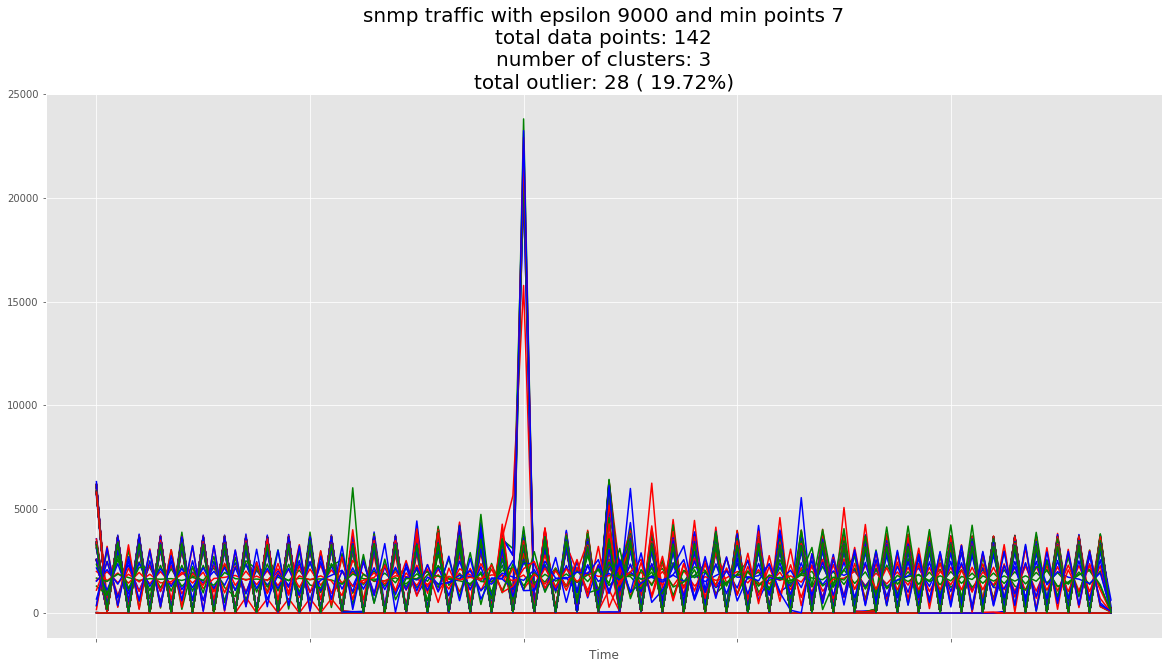

In [5]:
normal.plot(legend = False, figsize = (20, 10), color = ['r', 'b', 'g'])
title = df_key +' traffic with epsilon ' + \
    str(epsilon) + ' and min points ' + str(miniminum_points) + '\n' + \
    'total data points: ' + str( numOfTrainingSample ) + '\n' + \
     'number of clusters: ' + str(len(clusters) - 1) + '\n' + \
    'total outlier: ' + str( clusters[-1] ) + \
    ' ( ' +  str( round(clusters[-1]  * 100.0 / numOfTrainingSample , 2)) + '%)'

plt.title(title, fontsize=20)


Text(0.5, 1.0, 'First Cluster: Failing at data collection (7)')

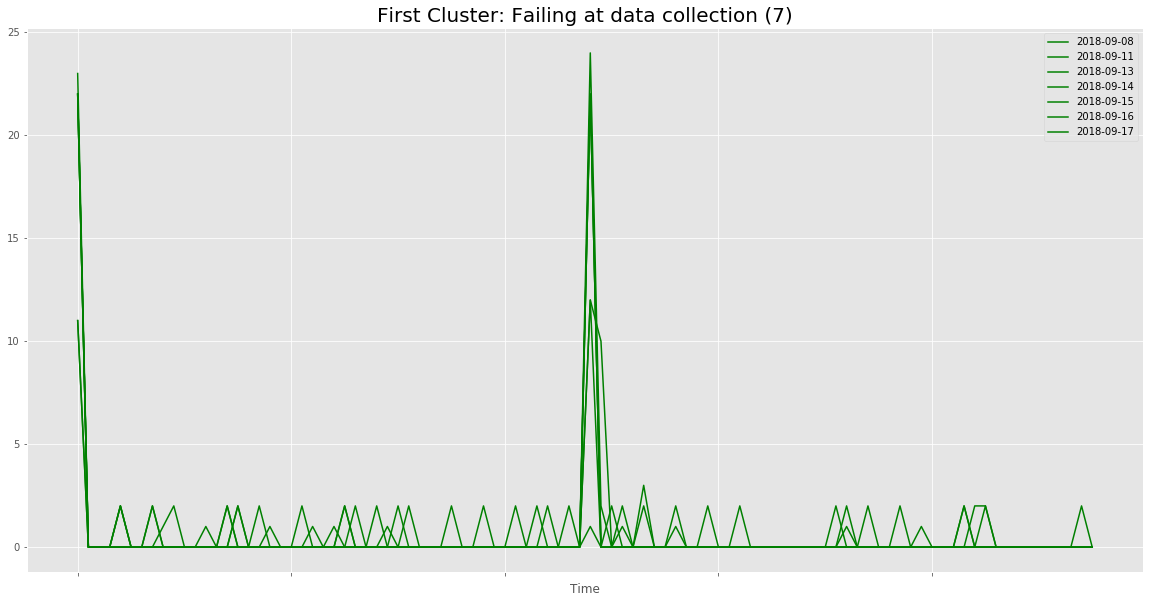

In [6]:
df_cluster0 = pd.DataFrame(df)
cluster0 = df_normal[model.labels_ == 0].T
title0 = 'First Cluster: Failing at data collection (' + str(len(cluster0.columns)) + ')' 
cluster0.plot( figsize = (20,10), color = 'g')
plt.title(title0, fontsize=20)

Text(0.5, 1.0, 'Second Cluster: First 10 Mondays??')

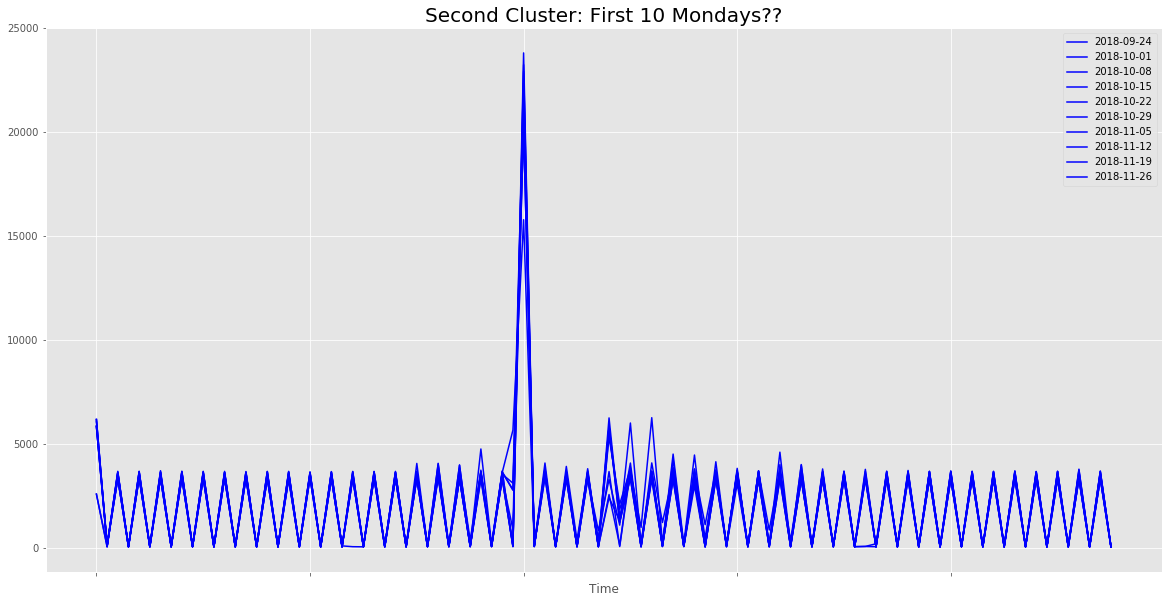

In [7]:
df_cluster2 = pd.DataFrame(df)
cluster2 = df_normal[model.labels_ == 2].T
title2 = 'Second Cluster: First ' + str(len(cluster2.columns)) + ' Mondays??'

cluster2.plot(figsize = (20,10), color = 'b')
plt.title(title2, fontsize = 20)

Text(0.5, 1.0, '2 of the 10 Mondays \n Euclidean Distance between 2018-10-08 and 2018-10-15: \n1747.14')

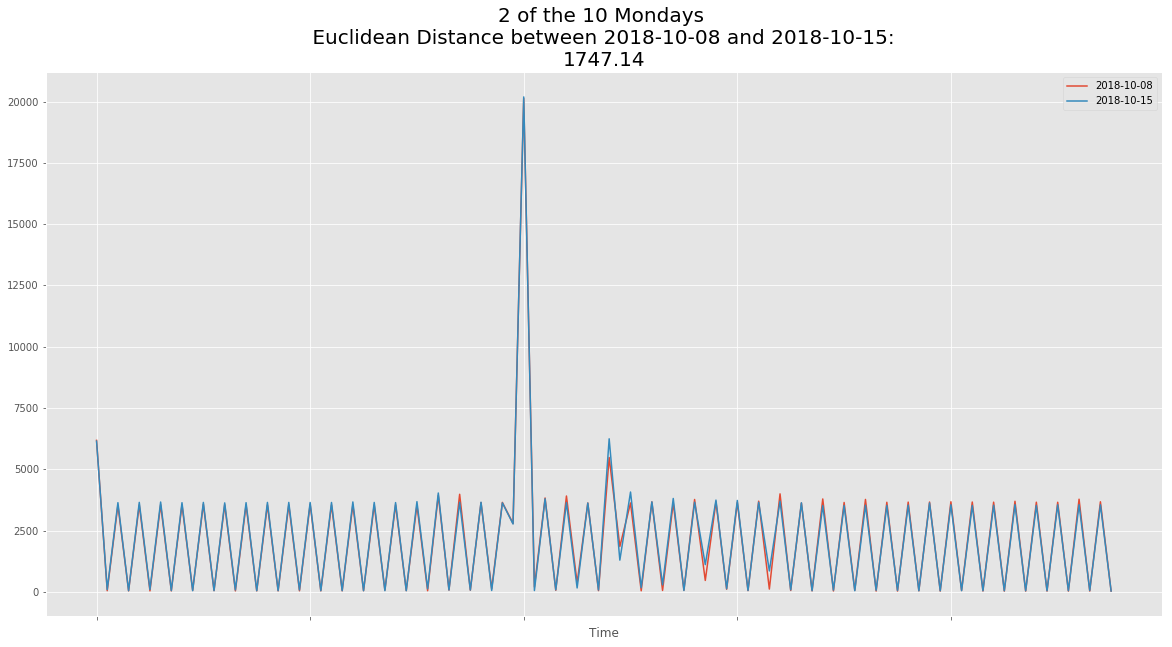

In [8]:
euclid = distance.euclidean(test_df[date5], test_df[date6])
title = '2 of the 10 Mondays \n Euclidean Distance between ' + \
    date5 + ' and '+ date6 + ": \n"+ str(round(euclid,2))

test_df[[ date5, date6]].plot(legend=True, figsize = (20, 10) )
plt.title(title, fontsize=20)

Text(0.5, 1.0, 'Final Cluster: Majority (97 days / 68.31%) ')

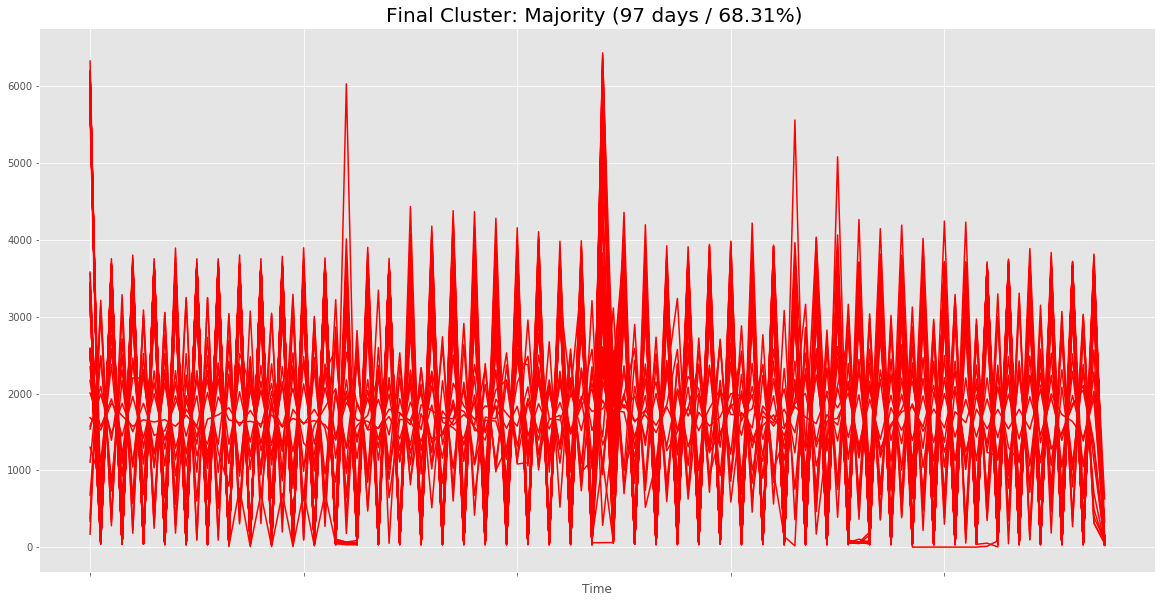

In [9]:
df_cluster1 = pd.DataFrame(df)
cluster1 = df_normal[model.labels_ == 1].T
total = len(cluster1.columns)
title1 = 'Final Cluster: Majority (' + str(total) + ' days / ' +\
    str(round(total * 100.0 / numOfTrainingSample,2)) + '%) '

cluster1.plot(legend = False, figsize = (20,10), color = 'r')
plt.title(title1, fontsize = 20)


Text(0.5, 1.0, 'snmp traffic outlier (28)')

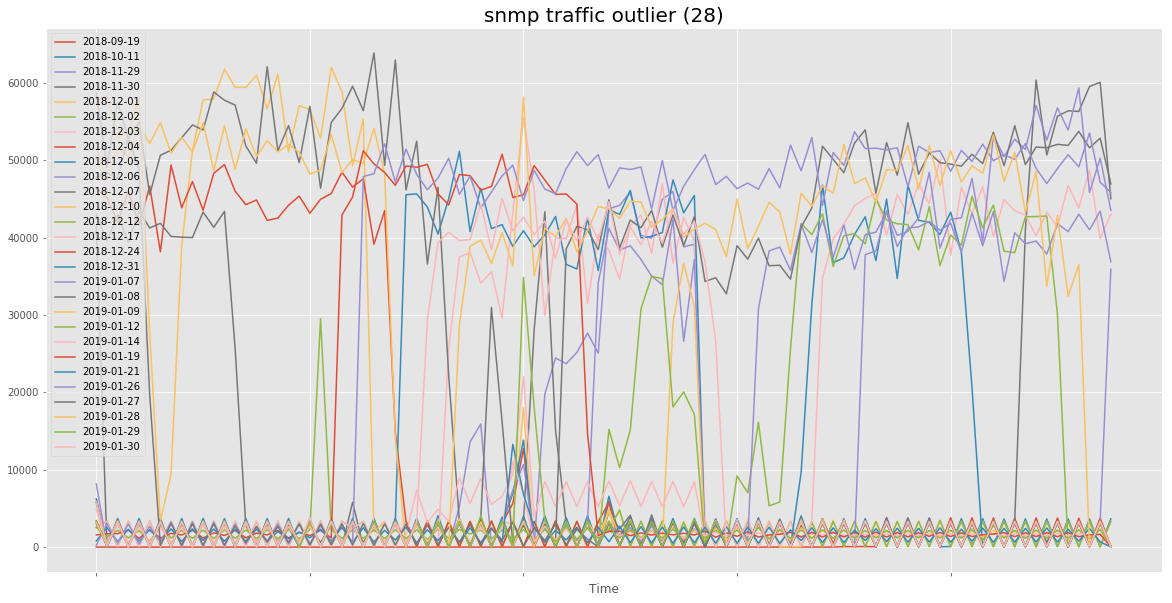

In [10]:
df_outlier = pd.DataFrame(df) 
outlier = df_outlier[model.labels_ == -1].T
title_o = df_key + ' traffic outlier (' + str( len(outlier.columns ) ) + ')'

outlier.plot(legend=True, figsize = (20, 10) )
plt.title(title_o, fontsize=20)

<h2><center>Outliers on Jan 26th and 27th compared to 24th and 25th!</center></h2>

Text(0.5, 1.0, 'Outliers on Jan 26th and 27th, compared to 2 previous days')

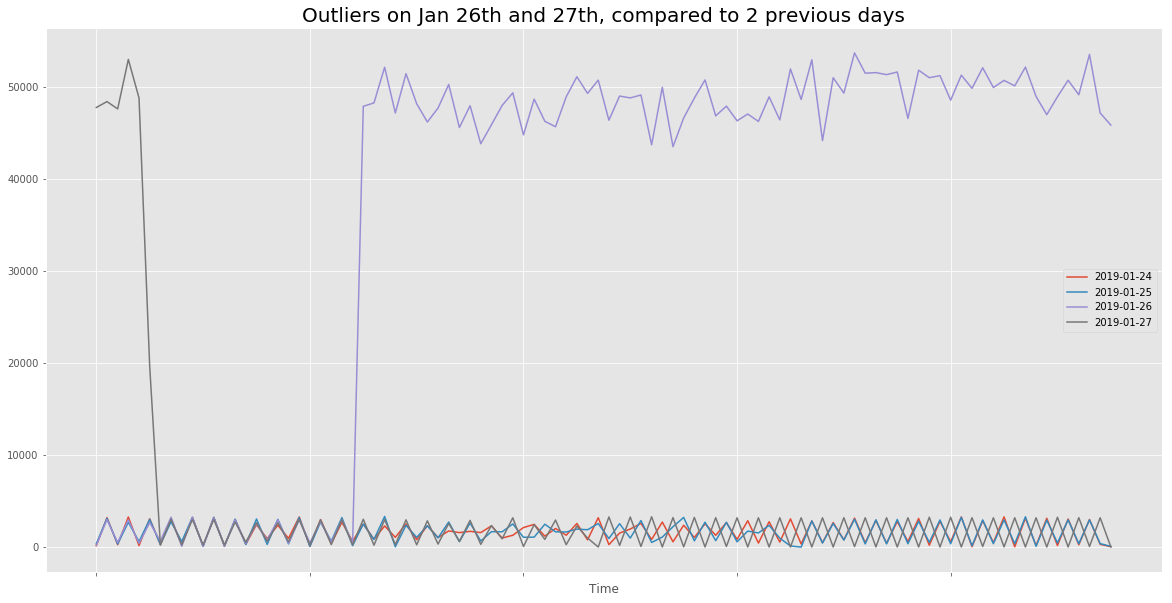

In [11]:
sample_df = df.T
sample_df = sample_df[['2019-01-24','2019-01-25','2019-01-26','2019-01-27']]
title_s = 'Outliers on Jan 26th and 27th, compared to 2 previous days'

sample_df.plot(legend=True, figsize = (20, 10) )
plt.title(title_s, fontsize=20)


Text(0.5, 1.0, 'Jan 24th and 25th (Thursday and Friday) \n before outlier on 26th and 27th    \n Euclidean Distance between 2019-01-24 and 2019-01-25: \n6308.96')

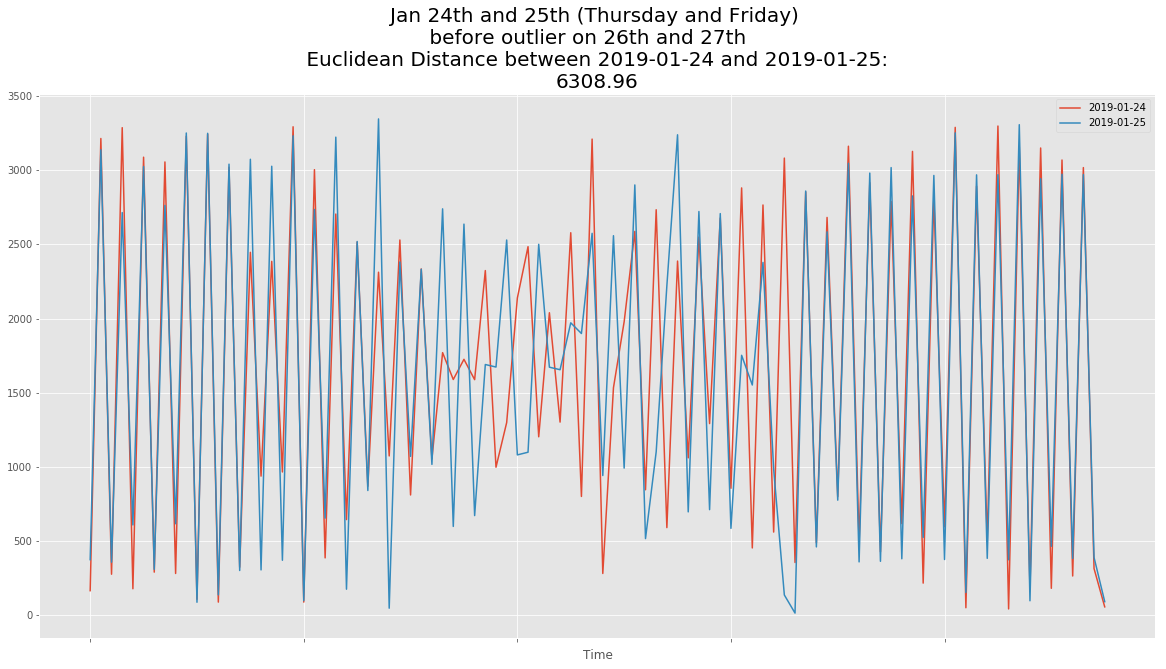

In [12]:
euclid = distance.euclidean(test_df[date1], test_df[date2])
title = 'Jan 24th and 25th (Thursday and Friday) \n before outlier on 26th and 27th\
    \n Euclidean Distance between ' + \
    date1 + ' and '+ date2 + ": \n"+ str(round(euclid,2))

test_df[[ date1, date2]].plot(legend=True, figsize = (20, 10) )
plt.title(title, fontsize=20)

## Closest points

Text(0.5, 1.0, 'Christmas and New Year \n Euclidean Distance between 2018-12-25 and 2019-01-01: \n610.64')

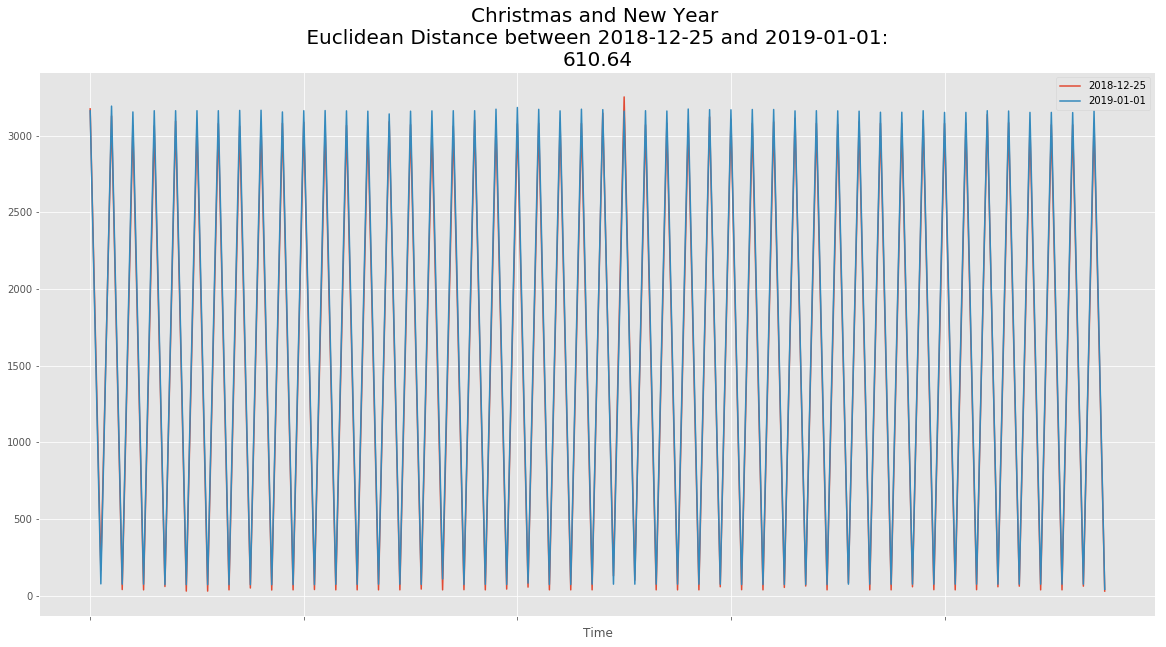

In [13]:
euclid = distance.euclidean(test_df[date7], test_df[date8])
title = 'Christmas and New Year \n Euclidean Distance between ' + \
    date7 + ' and '+ date8 + ": \n"+ str(round(euclid,2))

test_df[[ date7, date8]].plot(legend=True, figsize = (20, 10) )
plt.title(title, fontsize=20)